## 決定木：DecisionTreeClassfier

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arange(a, num):
    """numpy.ndarray を最小と最大の間で num+1 分割する"""
    amin, amax = a.min(), a.max()
    return np.arange(amin, amax + 1e-8, (amax - amin) / num)

def plot_tree(clf, X, y, num=50, colors=('red', 'blue')):
    """
    X[:, 0]とX[:, 1]の２次元で，yの0-1ラベルによる散布図と
    予測(clf.predict)の等高線（contourf）を描画
    """
    from matplotlib.colors import ListedColormap
    xx0, xx1 = np.meshgrid(arange(X[:, 0], num), arange(X[:, 1], num))
    
    Z = clf.predict(np.array([xx0.ravel(), xx1.ravel()]).T).reshape(xx0.shape)
    plt.contourf(xx0, xx1, Z, alpha=0.4, cmap=ListedColormap(colors))
    
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, c=colors[i])
    plt.show()

In [18]:
## 1. データの読み込み
df = pd.read_csv('data.csv', index_col=0)
df.head(3)

,x0,x1,y
0,6.938582,17.623393,0.0
1,27.417628,8.180353,0.0
2,21.562673,11.799253,0.0


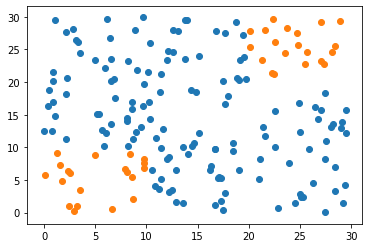

In [19]:
## 2. データのプロット
plt.scatter(df[df['y'] == 0]['x0'], df[df['y'] == 0]['x1'])
plt.scatter(df[df['y'] == 1]['x0'], df[df['y'] == 1]['x1'])

In [20]:
## 3. 説明変数 目的変数の取得
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
## 4. データの分割
from sklearn.model_selection import train_test_split

(X_train, X_test, 
 y_train, y_test, ) = train_test_split(
    X, y, test_size=0.3, random_state=0 )

In [27]:
## 5. 学習 スコア
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.8518518518518519

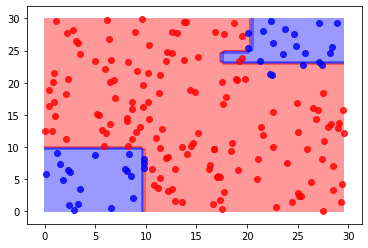

In [28]:
## 6. 学習領域のプロット
plot_tree(tree, X, y)